# **Projeto: Descobrindo técnicos do Brasileirão**

# Desafio
Dado um arquivo, do tipo JSON, contendo uma infinidade de informações de cada jogo do Brasileirão de 2023, extrair e mostrar todos os técnicos que estiverem presentes nos jogos.

In [2]:
from google.colab import files


In [3]:
uploaded = files.upload()


Saving brasileirao-2023.json to brasileirao-2023.json


In [4]:
import json

with open('brasileirao-2023.json', 'r', encoding='utf-8') as f:
    dados = json.load(f)


In [5]:
print(type(dados))


<class 'dict'>


In [6]:
print(dados.keys())


dict_keys(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38'])


In [7]:
import json
print(json.dumps(dados['1'][0], indent=2, ensure_ascii=False))


{
  "clubs": {
    "home": "Palmeiras",
    "away": "Cuiabá"
  },
  "goals": {
    "home": "2",
    "away": "1"
  },
  "cards": {
    "home": {
      "yellow": [
        {
          "time": "66'",
          "player": "Jhonatan dos Santos Rosa",
          "position": "Meio-campo",
          "number": "40"
        },
        {
          "time": "37'",
          "player": "José Manuel Alberto López",
          "position": "Meio-campo",
          "number": "18"
        }
      ],
      "red": []
    },
    "away": {
      "yellow": [
        {
          "time": "52'",
          "player": "Filipe Augusto Carvalho Souza",
          "position": "Meio-campo",
          "number": "5"
        },
        {
          "time": "48'",
          "player": "Mateusinho",
          "position": "Zagueiro",
          "number": "98"
        },
        {
          "time": "45+4'",
          "player": "Jonathan Cafú",
          "position": "Meio-campo",
          "number": "7"
        },
        {
          "

In [8]:
tecnicos = set()

for rodada in dados.values():  # percorre as 38 rodadas
    for jogo in rodada:        # percorre os jogos da rodada
        tecnico_home = jogo.get('coach', {}).get('home')
        tecnico_away = jogo.get('coach', {}).get('away')

        if tecnico_home:
            tecnicos.add(tecnico_home)
        if tecnico_away:
            tecnicos.add(tecnico_away)

# Exibição dos técnicos em ordem alfabética
for nome in sorted(tecnicos):
    print(nome)


A. Bacchi
A. C. Pracidelli
A. Cardoso de Oliveira
A. Evangelista Macedo Freitas
A. Ferreira
A. Moreira Ferreira
A. P. Mendes
A. Stival
A. Zago
B. Lazaroni
B. Nascimento
C. Maldonado
C. Salenave Santiago
C. da Silva
D. Aguirre Camblor
D. Giacomini
D. Silvestre Júnior
Danilo
E. Coudet
E. Rodrigues de Ávila
E. de Barros
F. Bustos
F. Diniz Silva
F. Lázaro Rodrigues Alves
F. Paiva Endres
F. Seabra
G. Dalzotto Bossle
I. Abreu Vieira
J. M. Barreto Martins
J. Mannarino
J. Sampaoli Moya
J. Vojvoda
L. Campos Borges
L. De Souza
L. Flávio
L. González
L. Iubel
L. Ribeiro de Castro
L. Scolari
L. Silvestre
L. Venker de Menezes
M. Fernandes
M. Henrique
M. J
M. Nogueira Barbieri
O. Hellmann
P. Autuori de Mello
P. Faria Caixinha
P. Marques da Costa Filipe
P. Turra
R. Alves Paiva
R. Ceni
R. Díaz
R. I. do Nascimento
Renato Gaúcho
S. De Azevedo Correia
S. Lobo
T. Kosloski
T. Retzalff Nunes
V. Carmo Mancini
V. Castanheira Penas
V. Luxemburgo da Silva
V. Severino
W. Alves
W. B. de Almeida
W. Carvalho


In [9]:
print(f"Total de técnicos únicos: {len(tecnicos)}")


Total de técnicos únicos: 66


# Desafio Extra 1

Lista de técnicos mais longevos:

In [11]:
from collections import defaultdict

# Dicionário para armazenar: clube -> técnico -> número de jogos
comandos = defaultdict(lambda: defaultdict(int))

# Percorrer rodadas e jogos
for rodada in dados.values():
    for jogo in rodada:
        coach = jogo.get('coach', {})
        clubs = jogo.get('clubs', {})

        # Técnico e clube mandante
        tecnico_home = coach.get('home')
        clube_home = clubs.get('home')
        if tecnico_home and clube_home:
            comandos[clube_home][tecnico_home] += 1

        # Técnico e clube visitante
        tecnico_away = coach.get('away')
        clube_away = clubs.get('away')
        if tecnico_away and clube_away:
            comandos[clube_away][tecnico_away] += 1

# Técnico mais longevo (maior número de jogos) por clube
tecnicos_longevos = []

for clube, tecnicos in comandos.items():
    tecnico_mais_longevo = max(tecnicos.items(), key=lambda x: x[1])
    tecnicos_longevos.append((clube, tecnico_mais_longevo[0], tecnico_mais_longevo[1]))

# Ordenar por técnico mais longevo, em ordem decrescente
tecnicos_longevos.sort(key=lambda x: x[2], reverse=True)


# Exibir
for item in tecnicos_longevos:
    print(item)


('Bragantino', 'P. Faria Caixinha', 38)
('Fortaleza', 'J. Vojvoda', 38)
('Grêmio', 'Renato Gaúcho', 37)
('São Paulo', 'D. Silvestre Júnior', 35)
('Fluminense', 'F. Diniz Silva', 33)
('Palmeiras', 'A. Moreira Ferreira', 32)
('Cuiabá', 'A. Cardoso de Oliveira', 28)
('Athletico-PR', 'W. Carvalho', 28)
('Atlético-MG', 'L. Scolari', 26)
('Vasco da Gama', 'R. Díaz', 24)
('Flamengo', 'J. Sampaoli Moya', 24)
('Goiás', 'A. Evangelista Macedo Freitas', 23)
('Bahia', 'R. Alves Paiva', 22)
('Internacional', 'E. Coudet', 22)
('Corinthians', 'V. Luxemburgo da Silva', 21)
('Coritiba', 'T. Kosloski', 21)
('Cruzeiro', 'P. Marques da Costa Filipe', 20)
('América-MG', 'V. Carmo Mancini', 17)
('Santos', 'M. Fernandes', 15)
('Botafogo', 'L. Ribeiro de Castro', 11)


# Desafio Extra 2

Tabela final contendo:

- Posição (pos)
- Nome do clube (Equipe)
- Pontos (Pts)
- Número de vitórias (V)
- Número de empates (E)
- Número de derrotas (D)
- Gols feitos/Gols pró (GP)
- Gols sofridos/Gols contra (GC)
- Saldo de gols (SG)



In [12]:
from collections import defaultdict

# Estrutura para guardar estatísticas dos clubes
tabela = defaultdict(lambda: {
    'Pts': 0,
    'V': 0,
    'E': 0,
    'D': 0,
    'GP': 0,
    'GC': 0
})

# Percorrer rodadas e jogos
for rodada in dados.values():
    for jogo in rodada:
        clubes = jogo.get('clubs', {})
        gols = jogo.get('goals', {})

        mandante = clubes.get('home')
        visitante = clubes.get('away')

        gols_mandante = int(gols.get('home', 0))
        gols_visitante = int(gols.get('away', 0))

        # Atualiza gols feitos e sofridos
        tabela[mandante]['GP'] += gols_mandante
        tabela[mandante]['GC'] += gols_visitante

        tabela[visitante]['GP'] += gols_visitante
        tabela[visitante]['GC'] += gols_mandante

        # Determina resultado
        if gols_mandante > gols_visitante:
            # Vitória mandante
            tabela[mandante]['V'] += 1
            tabela[mandante]['Pts'] += 3
            tabela[visitante]['D'] += 1
        elif gols_visitante > gols_mandante:
            # Vitória visitante
            tabela[visitante]['V'] += 1
            tabela[visitante]['Pts'] += 3
            tabela[mandante]['D'] += 1
        else:
            # Empate
            tabela[mandante]['E'] += 1
            tabela[visitante]['E'] += 1
            tabela[mandante]['Pts'] += 1
            tabela[visitante]['Pts'] += 1

# Calcular saldo de gols (SG)
for clube, stats in tabela.items():
    stats['SG'] = stats['GP'] - stats['GC']

# Converter para lista ordenada
tabela_final = sorted(
    [(clube, valores['Pts'], valores['V'], valores['E'], valores['D'], valores['GP'], valores['GC'], valores['SG'])
     for clube, valores in tabela.items()],
    key=lambda x: (-x[1], -x[2], -x[7])  # Ordenar por Pts, Vitórias, SG
)

# Exibir tabela formatada
print(f"{'Pos':<4}{'Equipe':<20}{'Pts':>4}{'V':>4}{'E':>4}{'D':>4}{'GP':>5}{'GC':>5}{'SG':>5}")
for i, linha in enumerate(tabela_final, 1):
    clube, pts, v, e, d, gp, gc, sg = linha
    print(f"{i:<4}{clube:<20}{pts:>4}{v:>4}{e:>4}{d:>4}{gp:>5}{gc:>5}{sg:>5}")


Pos Equipe               Pts   V   E   D   GP   GC   SG
1   Palmeiras             70  20  10   8   64   33   31
2   Grêmio                68  21   5  12   63   56    7
3   Atlético-MG           66  19   9  10   52   32   20
4   Flamengo              66  19   9  10   56   42   14
5   Botafogo              64  18  10  10   58   37   21
6   Bragantino            62  17  11  10   49   35   14
7   Fluminense            56  16   8  14   51   47    4
8   Athletico-PR          56  14  14  10   51   43    8
9   Internacional         55  15  10  13   46   45    1
10  Fortaleza             54  15   9  14   45   44    1
11  São Paulo             53  14  11  13   40   38    2
12  Cuiabá                51  14   9  15   40   39    1
13  Corinthians           50  12  14  12   47   48   -1
14  Cruzeiro              47  11  14  13   35   32    3
15  Vasco da Gama         45  12   9  17   41   51  -10
16  Bahia                 44  12   8  18   50   53   -3
17  Santos                43  11  10  17   39   

# Desafio Extra 3

Situação do campeonato na rodada 25:

In [13]:
from collections import defaultdict

# Rodada alvo
rodada_limite = 25

# Estatísticas por clube até a rodada 25
tabela_parcial = defaultdict(lambda: {
    'Pts': 0,
    'V': 0,
    'E': 0,
    'D': 0,
    'GP': 0,
    'GC': 0,
    'PJ': 0
})

# Processar rodadas de 1 até 25
for i in range(1, rodada_limite + 1):
    rodada = dados[str(i)]
    for jogo in rodada:
        clubes = jogo.get('clubs', {})
        gols = jogo.get('goals', {})

        mandante = clubes.get('home')
        visitante = clubes.get('away')

        gols_mandante = int(gols.get('home', 0))
        gols_visitante = int(gols.get('away', 0))

        # Atualiza PJ
        tabela_parcial[mandante]['PJ'] += 1
        tabela_parcial[visitante]['PJ'] += 1

        # Atualiza GP e GC
        tabela_parcial[mandante]['GP'] += gols_mandante
        tabela_parcial[mandante]['GC'] += gols_visitante

        tabela_parcial[visitante]['GP'] += gols_visitante
        tabela_parcial[visitante]['GC'] += gols_mandante

        # Atualiza pontos, vitórias, empates, derrotas
        if gols_mandante > gols_visitante:
            tabela_parcial[mandante]['V'] += 1
            tabela_parcial[mandante]['Pts'] += 3
            tabela_parcial[visitante]['D'] += 1
        elif gols_visitante > gols_mandante:
            tabela_parcial[visitante]['V'] += 1
            tabela_parcial[visitante]['Pts'] += 3
            tabela_parcial[mandante]['D'] += 1
        else:
            tabela_parcial[mandante]['E'] += 1
            tabela_parcial[visitante]['E'] += 1
            tabela_parcial[mandante]['Pts'] += 1
            tabela_parcial[visitante]['Pts'] += 1

# Calcular SG
for clube, stats in tabela_parcial.items():
    stats['SG'] = stats['GP'] - stats['GC']

# Organizar como lista e ordenar por Pts, Vitórias, SG
tabela_25 = sorted(
    [(clube, v['Pts'], v['PJ'], v['V'], v['E'], v['D'], v['GP'], v['GC'], v['SG'])
     for clube, v in tabela_parcial.items()],
    key=lambda x: (-x[1], -x[3], -x[8])
)

# Exibir tabela até a rodada 25
print(f"{'Pos':<4}{'Equipe':<20}{'Pts':>4}{'PJ':>4}{'V':>4}{'E':>4}{'D':>4}{'GP':>5}{'GC':>5}{'SG':>5}")
for i, linha in enumerate(tabela_25, 1):
    clube, pts, pj, v, e, d, gp, gc, sg = linha
    print(f"{i:<4}{clube:<20}{pts:>4}{pj:>4}{v:>4}{e:>4}{d:>4}{gp:>5}{gc:>5}{sg:>5}")


Pos Equipe               Pts  PJ   V   E   D   GP   GC   SG
1   Botafogo              52  25  16   4   5   40   16   24
2   Bragantino            45  25  12   9   4   35   22   13
3   Grêmio                44  25  13   5   7   40   32    8
4   Palmeiras             44  25  12   8   5   39   20   19
5   Flamengo              43  25  12   7   6   37   30    7
6   Fluminense            41  25  12   5   8   34   29    5
7   Atlético-MG           40  25  11   7   7   29   19   10
8   Athletico-PR          40  25  11   7   7   37   29    8
9   Fortaleza             39  25  11   6   8   30   24    6
10  São Paulo             34  25   9   7   9   31   27    4
11  Cuiabá                32  25   9   5  11   26   30   -4
12  Cruzeiro              30  25   7   9   9   24   22    2
13  Corinthians           30  25   7   9   9   29   31   -2
14  Internacional         29  25   7   8  10   20   29   -9
15  Santos                27  25   7   6  12   27   41  -14
16  Goiás                 27  25   6   9

# Desafio Extra 4

Gráfico de dispersão entre técnico mais longevo e posição no campeonato:

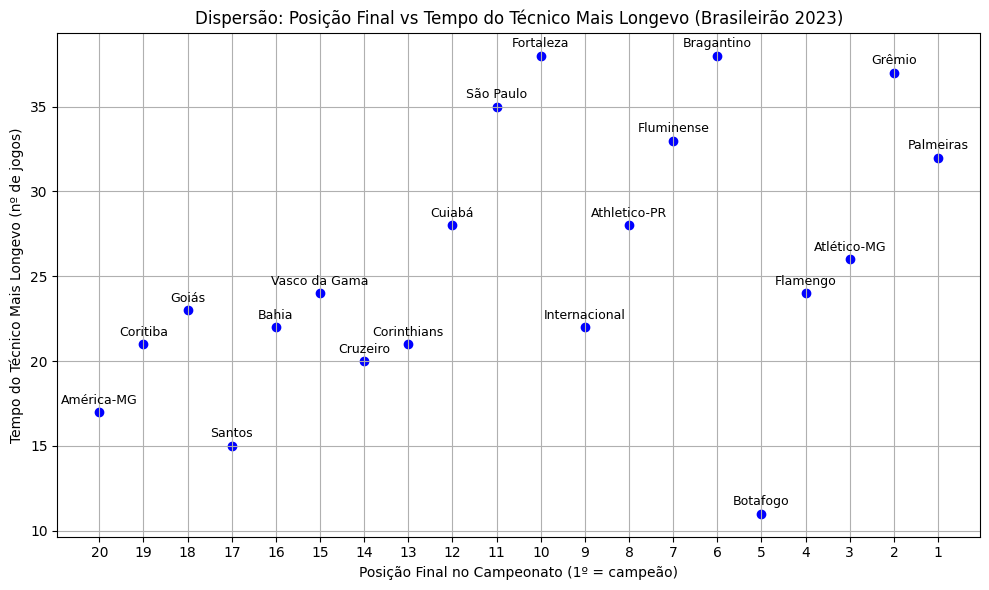

In [16]:
import matplotlib.pyplot as plt

# Criação do dicionário com longevidade por clube
longevidade_tecnico = {clube: jogos for clube, tecnico, jogos in tecnicos_longevos}

# Preparação dos dados para o gráfico
posicoes = []
jogos_tecnico = []
clubes_plot = []

for pos, linha in enumerate(tabela_final, 1):
    clube = linha[0]
    posicoes.append(pos)
    jogos_tecnico.append(longevidade_tecnico.get(clube, 0))
    clubes_plot.append(clube)

# Criação do gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(posicoes, jogos_tecnico, color='blue')

# Adicionar os nomes dos clubes acima dos pontos
for i in range(len(posicoes)):
    plt.text(posicoes[i], jogos_tecnico[i] + 0.5, clubes_plot[i], fontsize=9, ha='center')

# Configuração dos eixos e título
plt.xlabel('Posição Final no Campeonato (1º = campeão)')
plt.ylabel('Tempo do Técnico Mais Longevo (nº de jogos)')
plt.title('Dispersão: Posição Final vs Tempo do Técnico Mais Longevo (Brasileirão 2023)')

plt.gca().invert_xaxis()           # Posição 1 à esquerda
plt.xticks(range(1, 21))           # Eixo X com posições 1 a 20

plt.grid(True)
plt.tight_layout()
plt.show()


